سهند نوعی 9923087

لینک کولب:
https://colab.research.google.com/drive/1hwZA9LFVQvvhEZPWBsX2T2aO0XrX-t4N#scrollTo=bqyAdTKASWXy

<div dir=rtl>
<font color='red' size="6">آماده سازی نوت بوک</font>
<div dir=rtl>

><font size = "4"> 1.  قبل از هر کاری، با استفاده از مسیر نوشته شده در خط پایین، یک کپی از این نوتبوک در گوگل درایو خودتان بسازید و تمرین را در آن نسخه حل کنید.



<div dir=ltr>
<font size = "4" color='blue'>
File --> Save a copy in Drive
</font>
<div dir=rtl>

><font size = "4"> 2.   برای دسترسی به تصاویر مورد نیاز در این تکلیف، بدون اعمال هیچ تغییری در بلوک زیر، آن را اجرا کنید. با این کار فایل های مربوط به تکلیف (تصاویر) دانلود و در فولدر کولب شما قرار داده می شوند. انجام این مرحله پس از هر بار قطع شدن از کولب و اتصال دوباره، ضروری است. یعنی اگر مثلا یک سوال را حل کردید و بعد کولب را بستید یا مدتی با آن کار نکردید و اتصالتان به طور خودکار قطع شد، در اقدام بعدیتان برای نوشتن بقیه‌ی تمرین، حتما این بلوک باید دوباره اجرا شود.

In [1]:
#@title RUN THIS BLOCK WITHOUT ANY CHANGE to download the data
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl' -O 'DIP_HW3_data.zip'
!unzip DIP_HW3_data.zip

--2023-12-25 15:40:10--  https://drive.google.com/uc?export=download&id=1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl
Resolving drive.google.com (drive.google.com)... 172.253.63.101, 172.253.63.113, 172.253.63.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hf5kkk07j9294uffhp00spdt9a11k4a3/1703518800000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=e2a070f0-5998-40d4-8c84-20d9c4181398 [following]
--2023-12-25 15:40:11--  https://doc-00-1g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hf5kkk07j9294uffhp00spdt9a11k4a3/1703518800000/14300142125693899780/*/1ywJuPPm-NWkSfHMvB6xN7Y08S7H3L7Vl?e=download&uuid=e2a070f0-5998-40d4-8c84-20d9c4181398
Resolving doc-00-1g-docs.googleusercontent.com (doc-00-1g-docs.googleusercontent.com)... 142.251.167.132, 2607

# Imports
<div dir=rtl>
<font color="blue" size="6">فراخوانی کتابخانه ها</font>
<div dir=rtl>




In [ ]:
###
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
###

# Any Helper Functions

<div dir=rtl>
<font color="blue" size = "4">در صورت نیاز یا برای راحتی خودتان می‌توانید توابع کمکی‌ (مثلا برای عملیات‌های پر تکرار) این جا تعریف کنید (همه در همین بلوک).</font>
</div>



In [ ]:
###
def show(image, title):
    max_intensity = np.max(image)
    min_intensity = np.min(image)
    plt.title(title, color="blue")
    plt.imshow(image, cmap="gray", vmin=min_intensity, vmax=max_intensity)
    plt.axis("off")
    plt.show()


def show_plots(images_list, titles_list, rows=1):
    columns = len(images_list)
    fig, axes = plt.subplots(rows, columns, figsize=(20, 20))
    for i in range(columns):
        if rows == 1:
            axes[i].imshow(images_list[i], cmap="gray", vmin=np.min(images_list[i]), vmax=np.max(images_list[i]))
            axes[i].set_title(titles_list[i], color="blue")
            axes[i].axis("off")

        if rows >= 2:
            axes[0, i].imshow(images_list[i], cmap="gray", vmin=np.min(images_list[i]), vmax=np.max(images_list[i]))
            axes[0, i].set_title(titles_list[i], color="blue")
            axes[0, i].axis("off")

            bin_num = (np.max(images_list[i]) - np.min(images_list[i]) + 1) / 4
            bin_num = int(np.ceil(bin_num))
            hist, bins = np.histogram(images_list[i], bins=bin_num, range=(np.min(images_list[i]), np.max(images_list[i])))
            axes[1, i].bar(bins[:-1], hist)
    plt.show()

###

# Question 3: Image Restoration (35%)

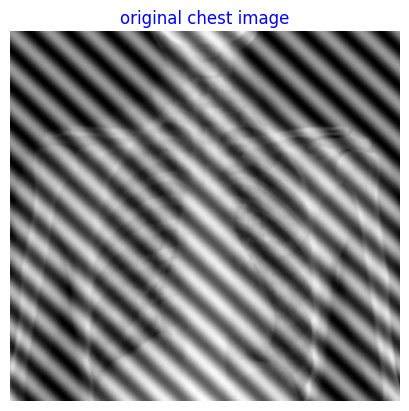

In [ ]:
#@title Q3 - Part 1 (5%)
###
chest = cv.imread("chest_xray.png", cv.IMREAD_GRAYSCALE)
show(chest, "original chest image")
###

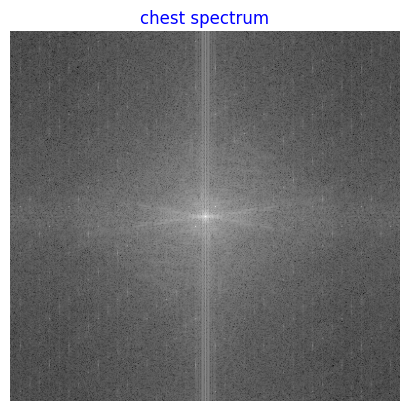

In [ ]:
#@title Q3 - Part 2 (10%)
###
fourier = np.fft.fft2(chest)
fourier = np.fft.fftshift(fourier)
# print(fourier.shape, fourier.dtype)
log_spectrum = 8 * np.log(np.abs(fourier))

show(log_spectrum, title="chest spectrum")
###

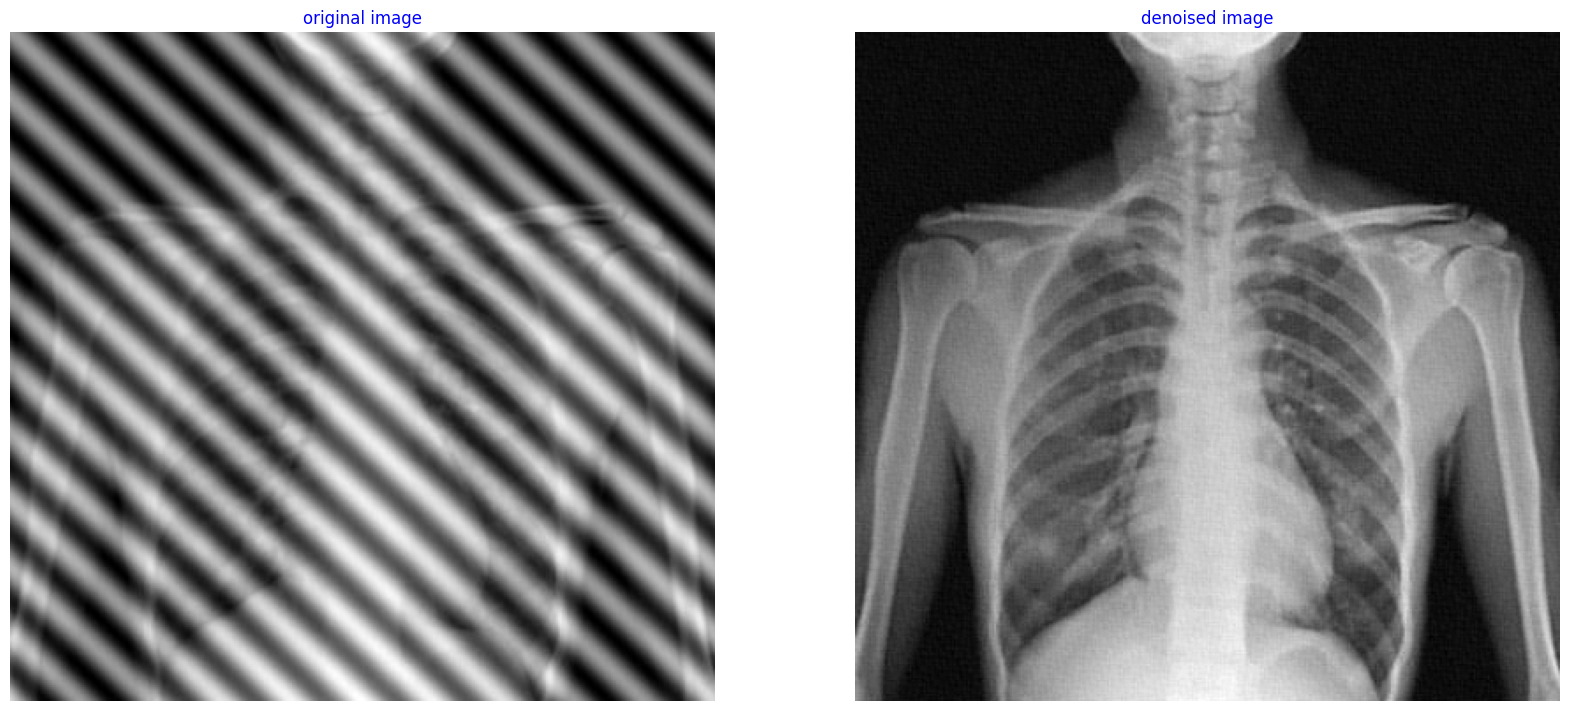

In [ ]:
#@title Q3 - Part 3 (30%)
spectrum_plot = fourier.flatten()

band_filter = np.ones_like(spectrum_plot)
band_filter[72210] = 0
band_filter[80190] = 0
band_filter = band_filter.reshape(fourier.shape)
denoised_fourier = fourier * band_filter
# اینجا لازم است توضیح بدهم که در این سوال بهتر است از band filter استفاده کنیم نه از notch filter.
# چون فرکانس نویز دوره ای ما فقط در یک نقطه قرار دارد نه در یک بازه که از notch filter استفاده کنیم.
# اما برای کم نشدن نمره قسمت band filter را هم به صورت کامنت قرار میدهم و در صورت تمایل میتوانید 5 خط بالا را کامنت کرده
# و 5 خط پایین را uncomment و ران کنید.
# notch_filter = np.ones_like(spectrum_plot)
# notch_filter[72000:72400] = 0
# notch_filter[80000:80400] = 0
# notch_filter = notch_filter.reshape(fourier.shape)
# denoised_fourier = fourier * notch_filter
denoised_chest = np.fft.ifft2(np.fft.ifftshift(denoised_fourier)).real.clip(0, 255).astype(np.uint8)
show_plots([chest, denoised_chest], ["original image", "denoised image"])

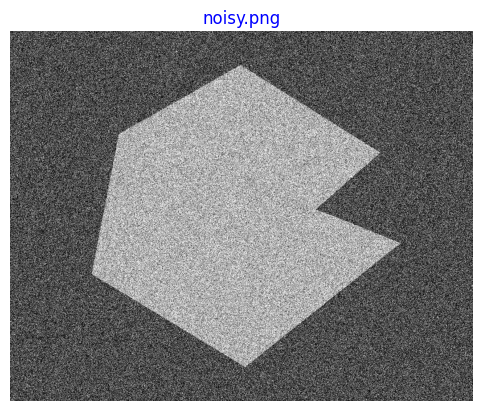

In [ ]:
#@title Q3 - Part 4 (5%)
###
noisy = cv.imread("noisy.png", cv.IMREAD_GRAYSCALE)
show(noisy, "noisy.png")
###

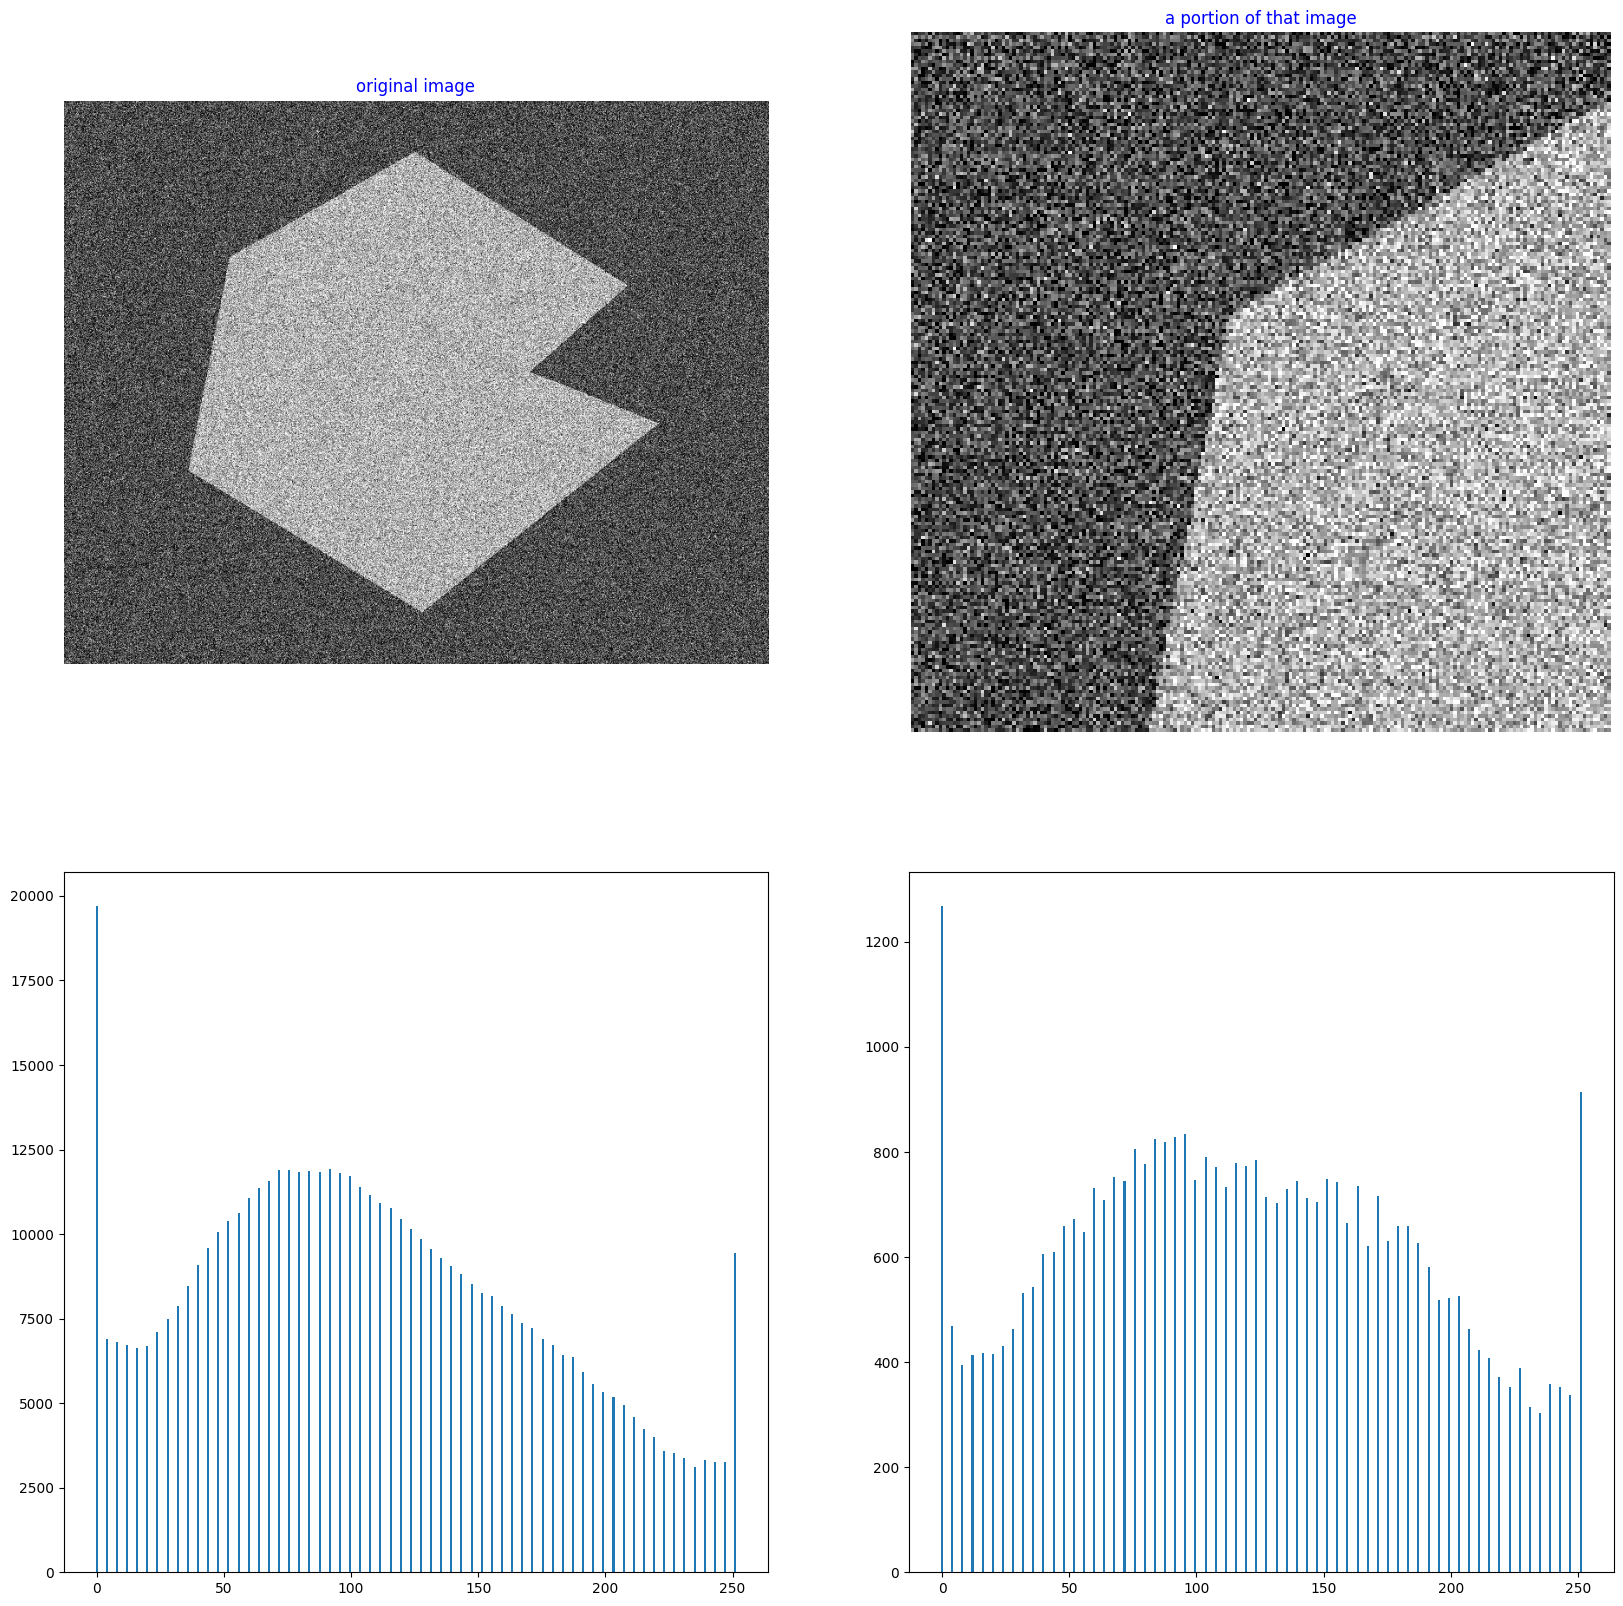

In [ ]:
#@title Q3 - Part 5 (15%)
###
noisy_band = noisy[100:300, 100:300]
show_plots([noisy, noisy_band], ["original image", "a portion of that image"], rows=2)
###

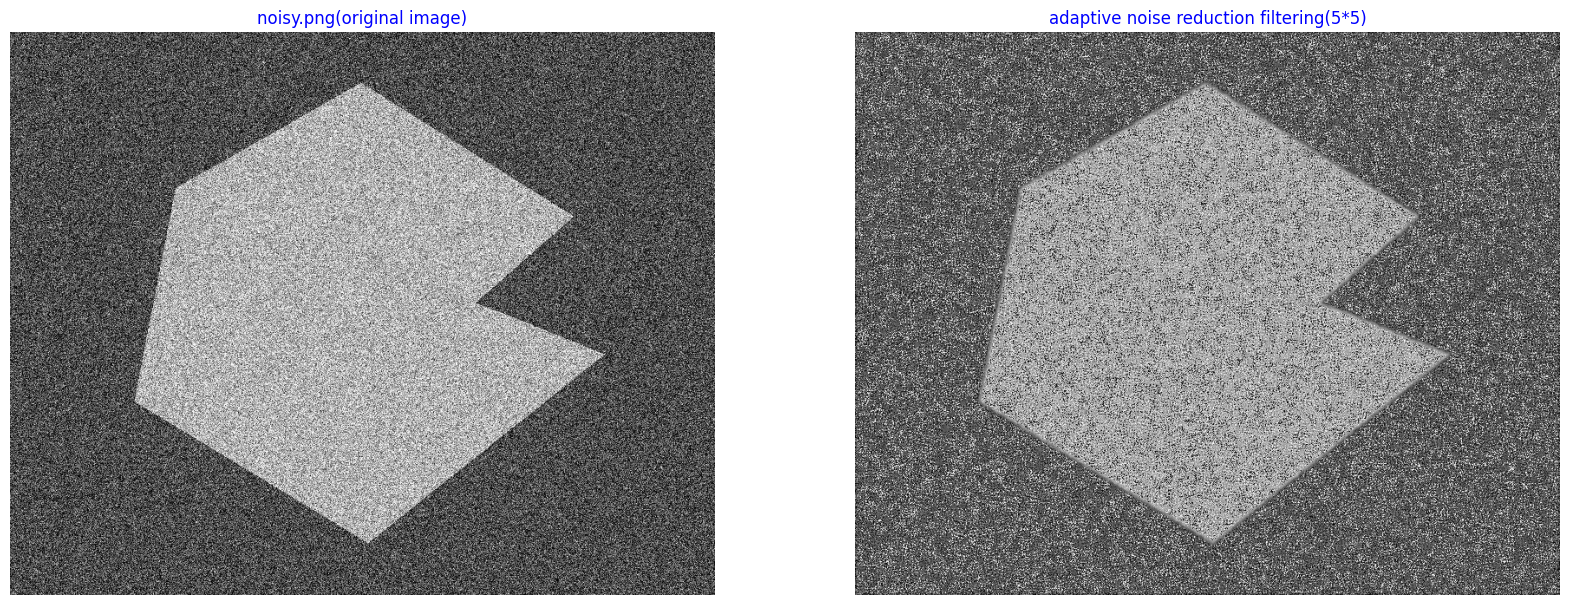

In [ ]:
#@title Q3 - Part 6 (15%)
###
g = noisy
f = np.copy(g)
var_global = np.var(g)
# f = g - (std_global**2 / std_local**2)*(g - mean_local)
counter = 0
for r in range(2, g.shape[0]-2):
    for c in range(2, g.shape[1]-2):
        s = g[r-2:r+3, c-2:c+3]
        f[r, c] = g[r, c] - (np.var(g)/np.var(s))*(g[r, c] - np.mean(s))
show_plots([g, f], ["noisy.png(original image)", "adaptive noise reduction filtering(5*5)"])
###

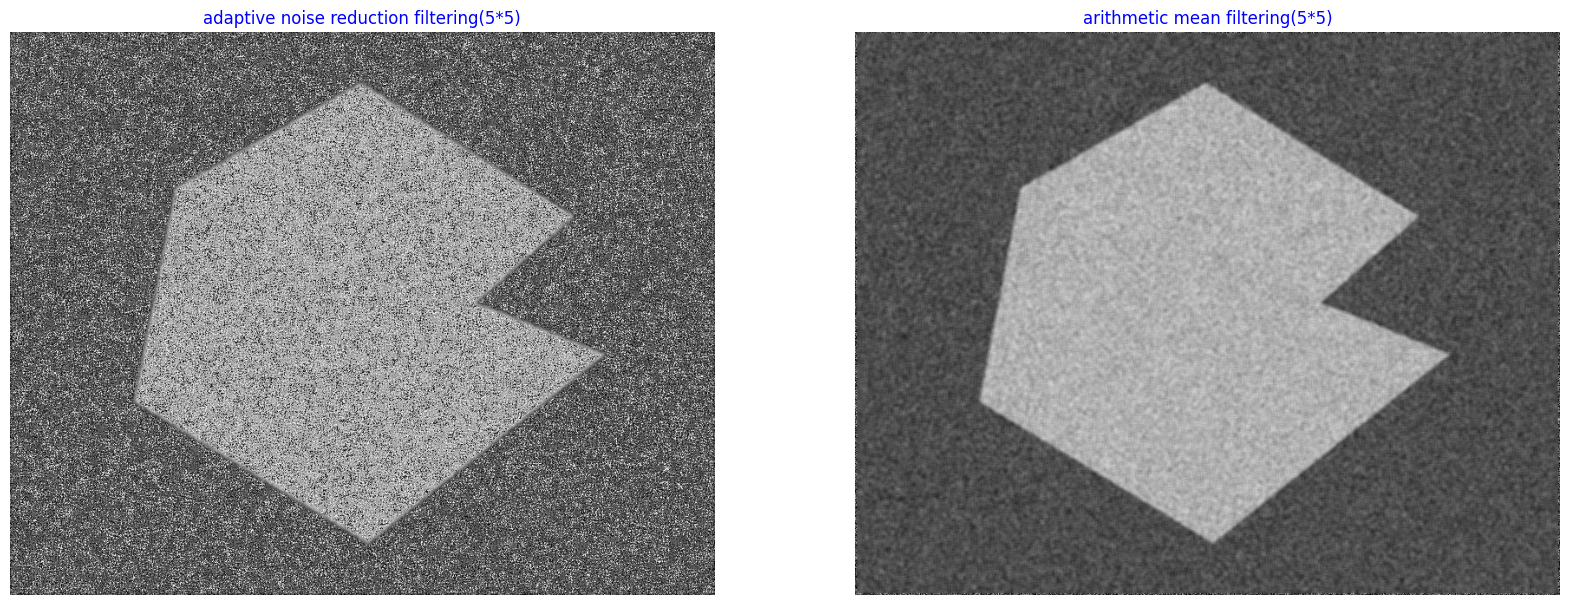

In [ ]:
#@title Q3 - Part 7 (10%)
###
g = noisy
f_mean = np.copy(g)
for r in range(2, g.shape[0]-2):
    for c in range(2, g.shape[1]-2):
        s = g[r-2:r+3, c-2:c+3]
        f_mean[r, c] = np.mean(s)
show_plots([f, f_mean], ["adaptive noise reduction filtering(5*5)", "arithmetic mean filtering(5*5)"])
###

<div dir=rtl><font color='green' size="5">جواب سوال ۳-۸</font>
<div>

<div dir=rtl><font size="4">
در فیلتر میانگین تصویر کمی تار و smooth میشود اما فیلتر تطبیقی به صورت local عمل میکند و این تارشدگی و پخش شدگی تصویر وجود ندارد.
</font><br />
</div>

# Question 4: Morphology (35%)

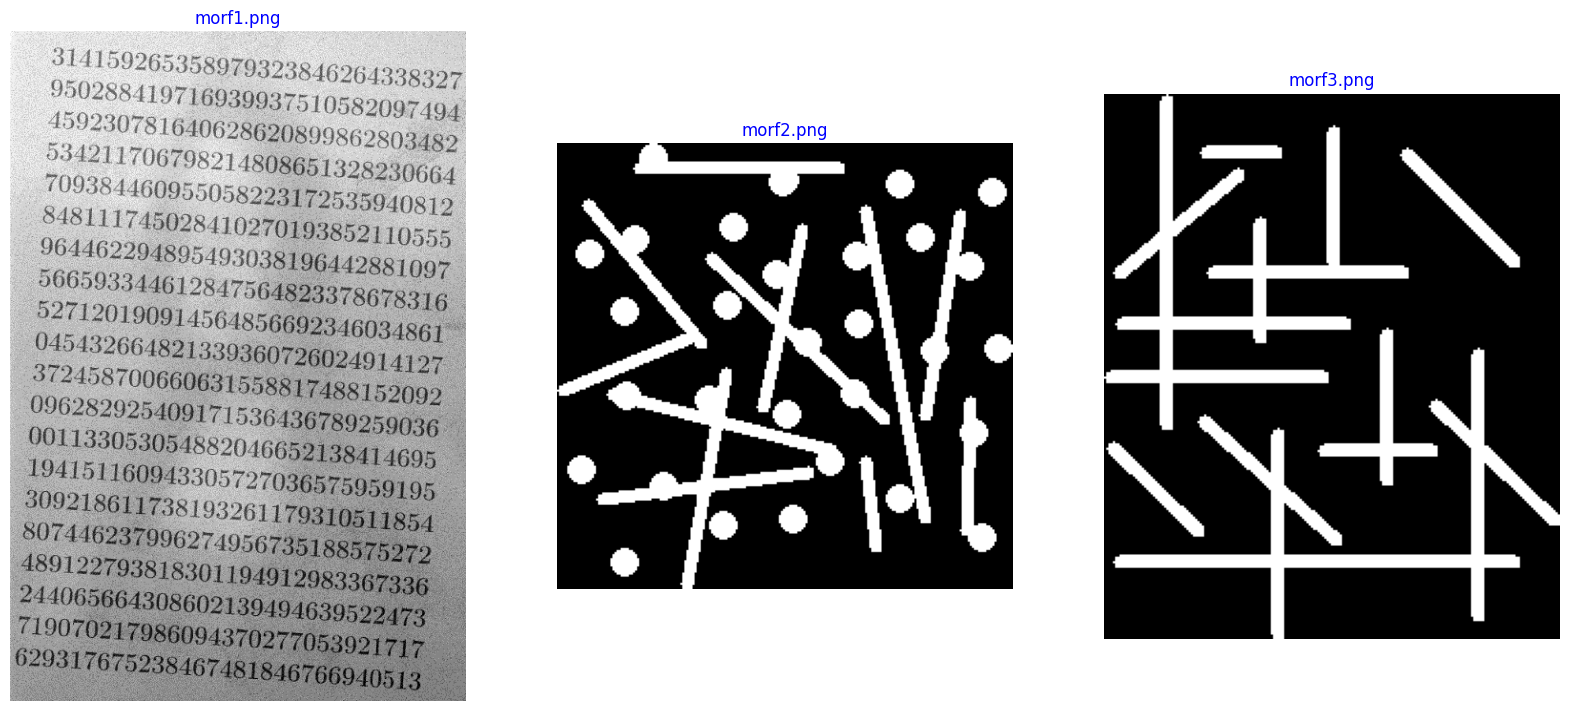

In [ ]:
#@title Q4 - Part 1 (5%)
###
morf1 = cv.imread("morf1.png", cv.IMREAD_GRAYSCALE)
morf2 = cv.imread("morf2.png", cv.IMREAD_GRAYSCALE)
morf3 = cv.imread("morf3.png", cv.IMREAD_GRAYSCALE)
show_plots([morf1, morf2, morf3], ["morf1.png", "morf2.png", "morf3.png"])
###

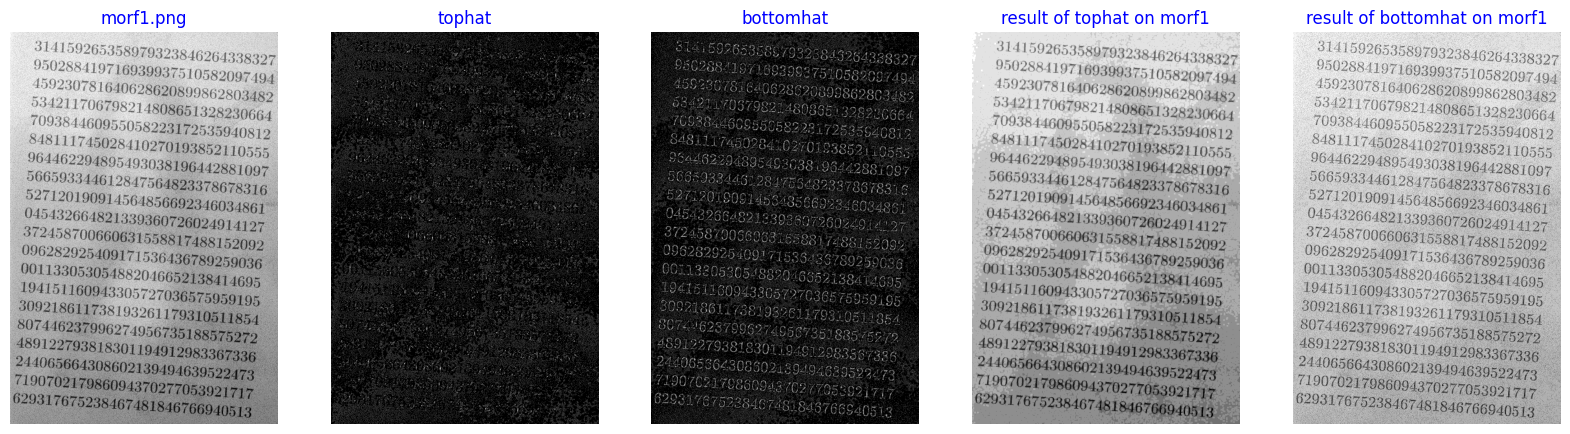

In [ ]:
#@title Q4 - Part 2 (35%)
###
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
tophat = cv.morphologyEx(morf1, cv.MORPH_TOPHAT, kernel)
bottomhat = cv.morphologyEx(morf1, cv.MORPH_BLACKHAT, kernel)
# show(tophat, "tophat")
result_tophat = morf1 - tophat
result_bottomhat = morf1 - bottomhat
show_plots([morf1, tophat, bottomhat, result_tophat, result_bottomhat],
           ["morf1.png", "tophat", "bottomhat", "result of tophat on morf1", "result of bottomhat on morf1"])
###

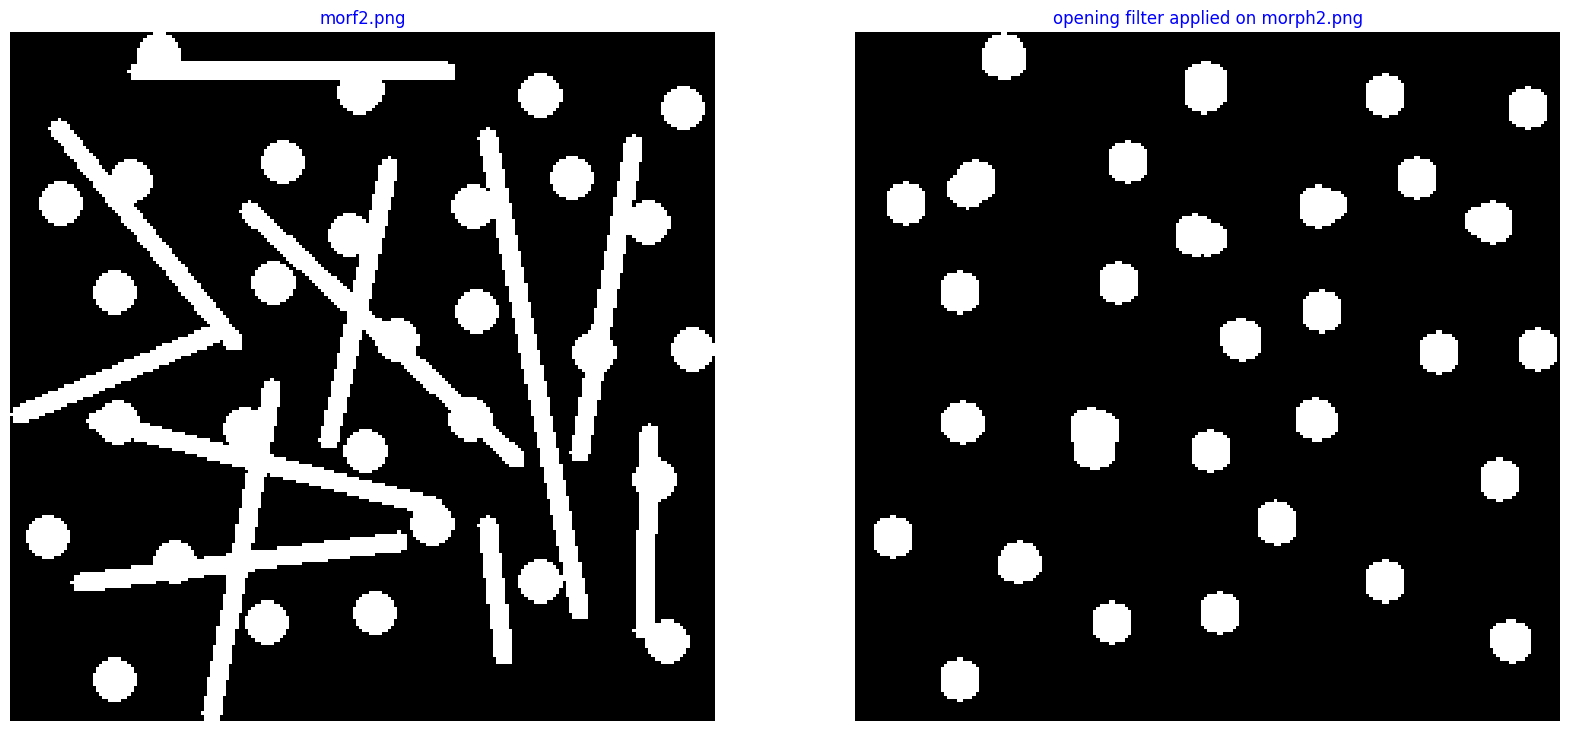

In [ ]:
#@title Q4 - Part 3 (20%)
###
# print(morf2.shape)
# print(morf2[15:40, 160:180])
radius = 5
opening_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (2*radius+1, 2*radius+1))
morph2_opened = cv.morphologyEx(morf2, cv.MORPH_OPEN, opening_kernel)
show_plots([morf2, morph2_opened], ["morf2.png", "opening filter applied on morph2.png"])
###

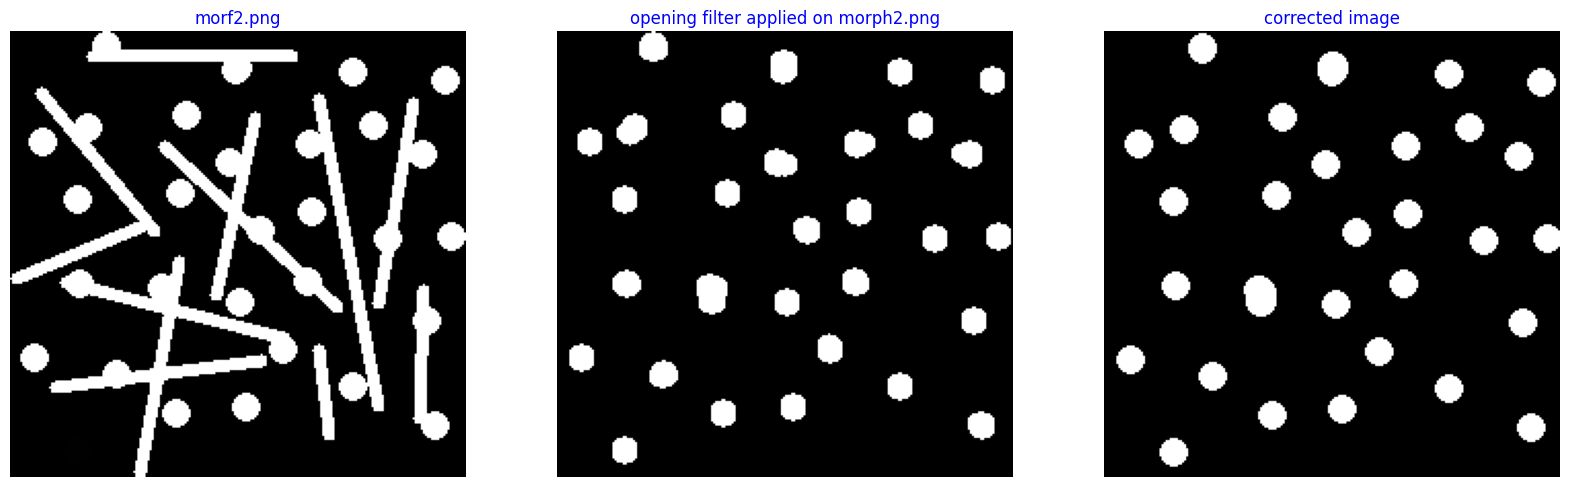

In [ ]:
#@title Q4 - Part 4 (10%)
###
# show(morf2[-20:-6, 26:40], "test")
# print(morf2[-20:-6, 26:40])
#میتوان از عملیات hit or miss برای اصلاح شکل دایره ها استفاده کرد
foreground_kernel = morf2[-19:-7, 27:39]
# print(kernel_hit_miss)
foreground_kernel[foreground_kernel == 255] = 1
background_kernel = 1 - foreground_kernel
foreground_img = cv.morphologyEx(morph2_opened, cv.MORPH_HITMISS, foreground_kernel)
background_img = cv.morphologyEx(1 - morph2_opened, cv.MORPH_HITMISS, background_kernel)
hit_miss = cv.bitwise_and(foreground_img, background_img)
dilation_kernel = morf2[-20:-6, 26:40]
morph2_dilation = cv.dilate(morph2_hitmiss, dilation_kernel)
# print(np.max(morph2_hitmiss))
# print(np.where(morph2_hitmiss == 255))
# print(morph2_hitmiss[-20:-6, 26:40])
show_plots([morf2, morph2_opened, morph2_dilation],
           ["morf2.png", "opening filter applied on morph2.png", "corrected image"])
###

<div dir=rtl><font color='green' size="5">## توضیحات سوال ۴-۴</font>
<div>

<div dir=rtl><font size="4">
ابتدا با استفاده از kernel دایره ای در تصویر اولیه عملیات opening انجام دادم تا دایره ها به دست آیند. سپس برای اصلاح بهتر آن دایره ها، از عملیات hit or miss استفاده کردم تا شکل دایره ها همانند تصویر اولیه شود.
 </font><br />
</div>

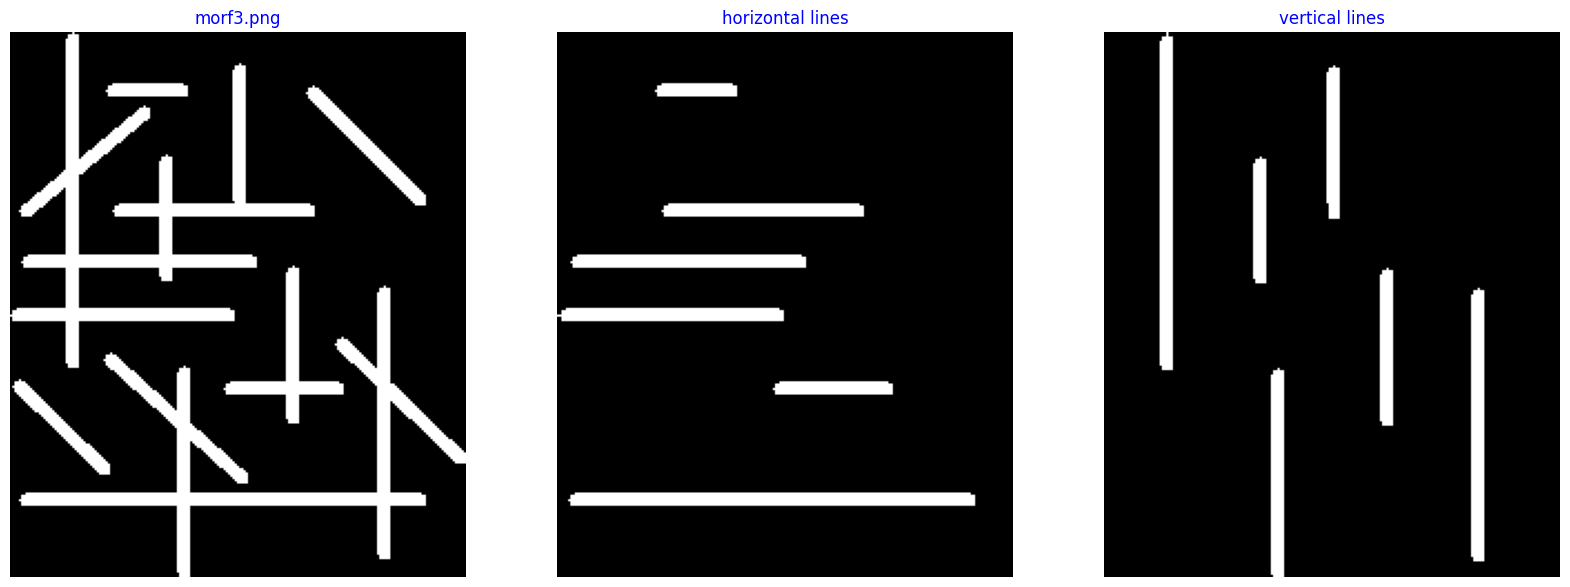

In [ ]:
#@title Q4 - Part 5 (20%)
###
# show(morf3[0:20, 20:32], "teste")
horizontal_kernel = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
horizontal_img = cv.morphologyEx(morf3, cv.MORPH_OPEN, horizontal_kernel)

vertical_kernel = np.array([
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1]
])
vertical_img = cv.morphologyEx(morf3, cv.MORPH_OPEN, vertical_kernel)
show_plots([morf3, horizontal_img, vertical_img], ["morf3.png", "horizontal lines", "vertical lines"])
###

In [ ]:
#@title Q4 - Part 6 (10%)
###

# ENTER YOUR CODE HERE.

###

<div dir=rtl>
<font color='green' size="5">## توضیحات سوال  ۴-۶</font>
<div>
<font size="4">
در قسمت 4-5 از فیلترهای افقی و عمودی با استفاده از عملیات opening استفاده کردم. بمولا که مشکلی تو نواحی برخورد خطوط وجود نداره که بخوام اصلاحش کنم. منطقا نباید واسه این قسمت نمره ای ازم کم بشه.
</font><br />
</div>

<div dir=rtl>
<font color='yellow' size = "7">	ملاحظات
</font>

</div>
<div dir=rtl>
<font size = "4">	** توجه داشتید باشید کولب خود را بصورت viewer به اشتراک بگذارید. (بالا سمت راست دکمه Share قرار دارد که موقع فشردن آن یک صفحه باز می‌شود و گزینه‌ای که بصورت پیشفرض نوشته restricted را تغییر دهید)
</font>
</div>

<div dir=rtl>
<font size = "4">	**	لطفاً بعد از تحویل تمرین دیگر کد گوگل کولب خود را باز نکنید و حتی کوچکترین تغییری (حتی در حد ایجاد یک space) در آن ندهید.(چرا که تاریخ آخرین ویرایش آن تغییر کرده و برای مصحح محترم قابل احراز نیست که این کد شما چه زمانی نوشته شده است (از نظر موعد قابل پذیرش برای تحویل) و بخش کدنویسی آن تمرین از شما پذیرفته نخواهد شد)

</font>
</div>

<div dir=rtl>
<font size = "4"> **	نحوه ارسال تمارین: PDF حل تمارین تشریحی به همراه کدهای نوشته شده (اشتراک لینک گوگل کولب شما (داخل Notepad و ابتدای گزارش تشریحی) + تحویل pdf پرینت آن + دانلود .ipynb آن) در قالب یک فایل فشرده zip به اسم HW0_Num باشند که Num شماره دانشجویی شما است مانند HW0_400133001 و فقط از طریق سامانه ی مدیریت یادگیری Courses ارسال بفرمایید. با آرزوی موفقیت برای شما  
</font>
</div>